# Introduction

A stochastic (random) process is simply one in which outcomes are uncertain. By contrast, a deterministic process always produces the same result for a given input. While functions and differential equations are often used to describe deterministic processes, we can use random variables and probability distribution functions to describe stochastic ones. 

Stochastic processes are very useful for the modeling of systems that have inherent randomness. This is certainly true in physics, and not the least for quantum systems. We will not delve deep into this topic in these notes. You might encounter stochastic modeling in the future when studying, for example, statistical physics. 

Instead, our specific goal is to become familiar with a special kind of stochastic processes known as Markov chains. Having defined and studied general properties, we will find that such chains be designed to produce samples from a stationary probability distribution of our choice. 

```{admonition} Discuss
Why is it so useful in Bayesian inference to be able to produce samples from a user-specified probability distrbution?
```


```{prf:example} An exponential growth model
:label: example:exponential-growth-models

Consider a simple exponential growth model to describe a population of bacteria in a culture with a food source. In a deterministic model we assert that the population grows at a fixed rate $\lambda$. The growth rate is then proportional to the population size as described by the differential equation

\begin{equation}
\frac{dy}{dt} = \lambda y(t).
\end{equation}

With the initial population $y(0) = y_0$, this equation is solved by the exponential function 

\begin{equation}
y(t) = y_0 \exp(\lambda t),
\end{equation} 

from which the population is precisely determined. For example, with $y_0 = 10$ and $\lambda = 0.25$ per minute we find that the population has almost doubled four times
after 11 minutes (since $y(11) = 15.6 \approx 16$). 

This model, however, does not take into account the randomness of the reproduction of individual organisms. This can be considered in a stochastic growth model where we assign the probability $\lambda \Delta t$ for a single bacteria to split once during a (very short) time interval $\Delta t$. This random process can be simulated using a short python script (click below to show the code). Ten different realizations of the stochastic model are visualized in {numref}`fig-bacterial-growth` and compared with the deterministic one. Questions that might be of scientific interest include:

* What is the expected number of bacteria at time $t$?
* What is the probability that the number of bacteria will exceed some threshold value after $t$ minutes?
* What is the distribution of the time it takes for the population to double in size? 
```

65.0

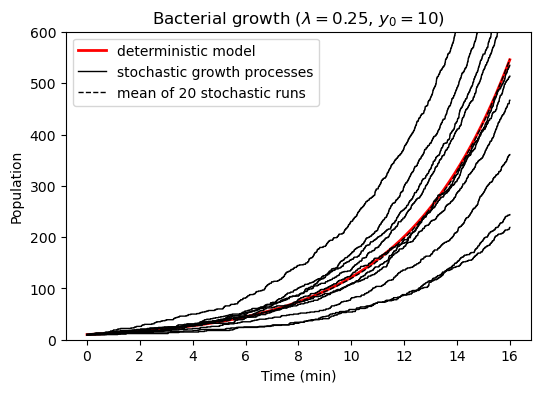

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from myst_nb import glue

# Set the relevant time interval and the model parameters
t = np.linspace(0,16,num=20000)
lam=0.25
y0=10

# Deterministic model
def y_deterministic(t,y0=1,lam=0.2):
    return y0*np.exp(lam*t)
    
# Stochastic model
def y_stochastic(t,y0=1,lam=0.2):
    y = [y0]
    assert max(t[1:]-t[:-1])/lam < 0.01, "The time interval must be much smaller than lambda."
    t_old = t[0]
    for t_i in t[1:]:
        dt = t_i-t_old
        t_old=t_i
        y_i = y[-1]
        # Increase the number of bacteria by the number of splits
        y_i += np.sum(np.random.random(y_i)<lam*dt)
        y.append(y_i)
    return np.array(y)
    
# Create a visualization
fig, ax = plt.subplots(nrows=1, ncols=1, sharey=True, **{"figsize":(6,4)})
ax.plot(t,y_deterministic(t,lam=lam,y0=y0),label='deterministic model',lw=2,color='red')
y_max = 1.1 * y_deterministic(t[-1],lam=lam,y0=y0)
np.random.seed(seed=3)
num_runs=20
y_runs = np.zeros((num_runs,len(t)))
for irun in range(num_runs):
    y_run = y_stochastic(t,lam=lam,y0=y0)
    if irun==0: label='stochastic growth processes'
    else: label=''
    if irun%2==0: ax.plot(t,y_run,lw=1,color='k',label=label)
    y_runs[irun,:] = y_run
y_mean = y_runs.mean(axis=0)
ax.plot(t,y_mean,lw=1,ls='--',color='k',label=f'mean of {num_runs} stochastic runs')
ax.set_ylim((0,y_max))
ax.legend(loc='best')
ax.set_xlabel('Time (min)')
ax.set_ylabel('Population')
ax.set_title(rf'Bacterial growth ($\lambda={lam}$, $y_0={y0}$)')

glue("bacterial-growth_fig", fig, display=False)

# How large is the probability that the number of bacteria exceeds 100 after 10 mins?
i10 = np.argmin(np.abs(t-10))
fraction_100_after_10min = 100 * np.sum(y_runs[:,i10]>100) / num_runs
glue("growth_question", fraction_100_after_10min)

```{glue:figure} bacterial-growth_fig
:name: "fig-bacterial-growth"

Growth of a bacteria population. The deterministic exponential growth curve is plotted against a number of realizations of a stochastic growth process. We find for example that {glue:text}`growth_question:.0f`% of the processes give 100 bacteria after ten minutes.
```